# **Uber Data 🚓**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("UberDataset.csv")

# **Start Exploring the Dataset**

In [ ]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [ ]:
pd.unique(df["CATEGORY"])

array(['Business', 'Personal', nan], dtype=object)

In [ ]:
pd.unique(df["PURPOSE"])

array(['Meal/Entertain', nan, 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

**Removing Nan Values**

In [ ]:
df["PURPOSE"] = df["PURPOSE"].fillna("Missing")
df["CATEGORY"] = df["CATEGORY"].fillna("Missing")

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [ ]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [ ]:
from dateutil.parser import parse

df["START_DATE"] = df["START_DATE"].apply(lambda x: parse(x))
df["END_DATE"] = df["END_DATE"].apply(lambda x: parse(x))

In [ ]:
df["day"] = df["START_DATE"].dt.strftime("%A")

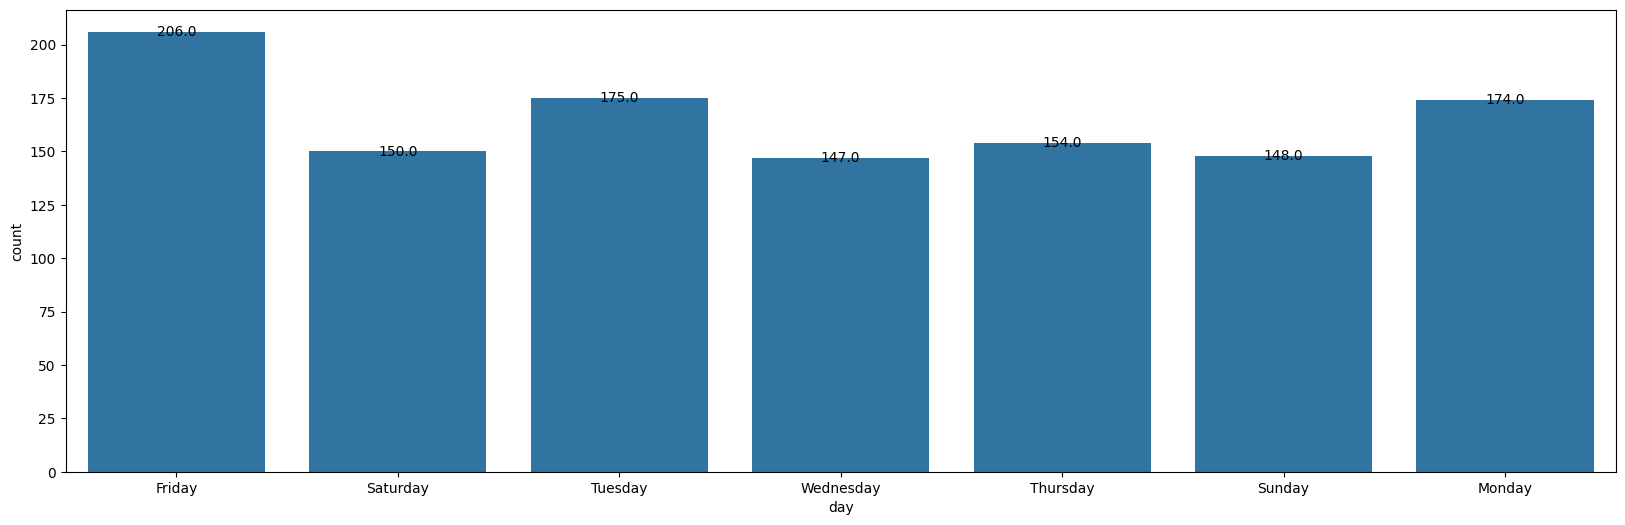

In [ ]:
plt.figure(figsize=(20,6))

a = sns.countplot(data=df,x="day")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
plt.show()

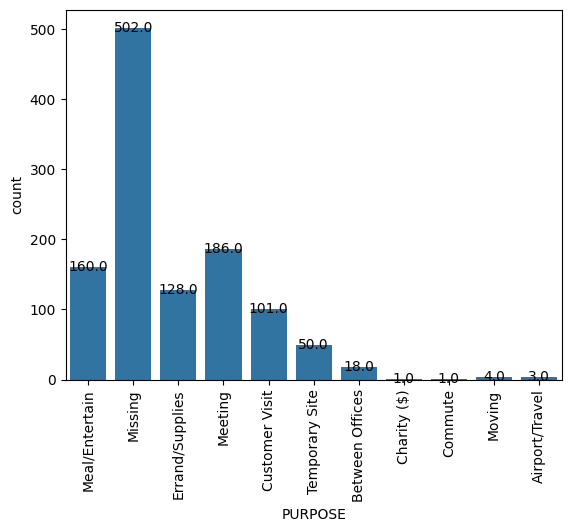

In [ ]:
a = sns.countplot(data=df,x="PURPOSE")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
    plt.xticks(rotation = 90)
plt.show()

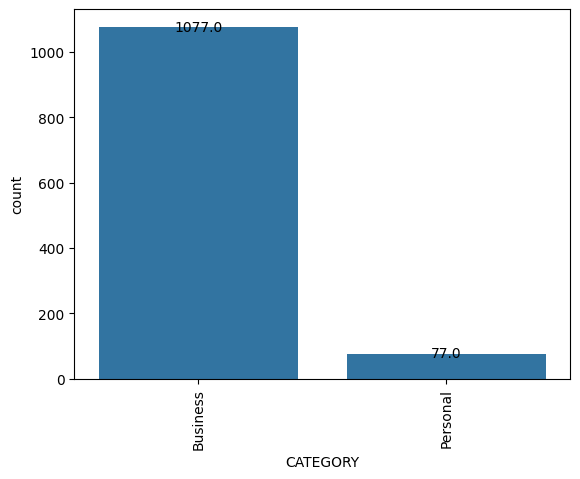

In [ ]:
a = sns.countplot(data=df,x="CATEGORY")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
    plt.xticks(rotation = 90)
plt.show()

In [ ]:
df["MILES"]=df["MILES"].astype(int)
df["MILES"] = np.abs(df["MILES"])

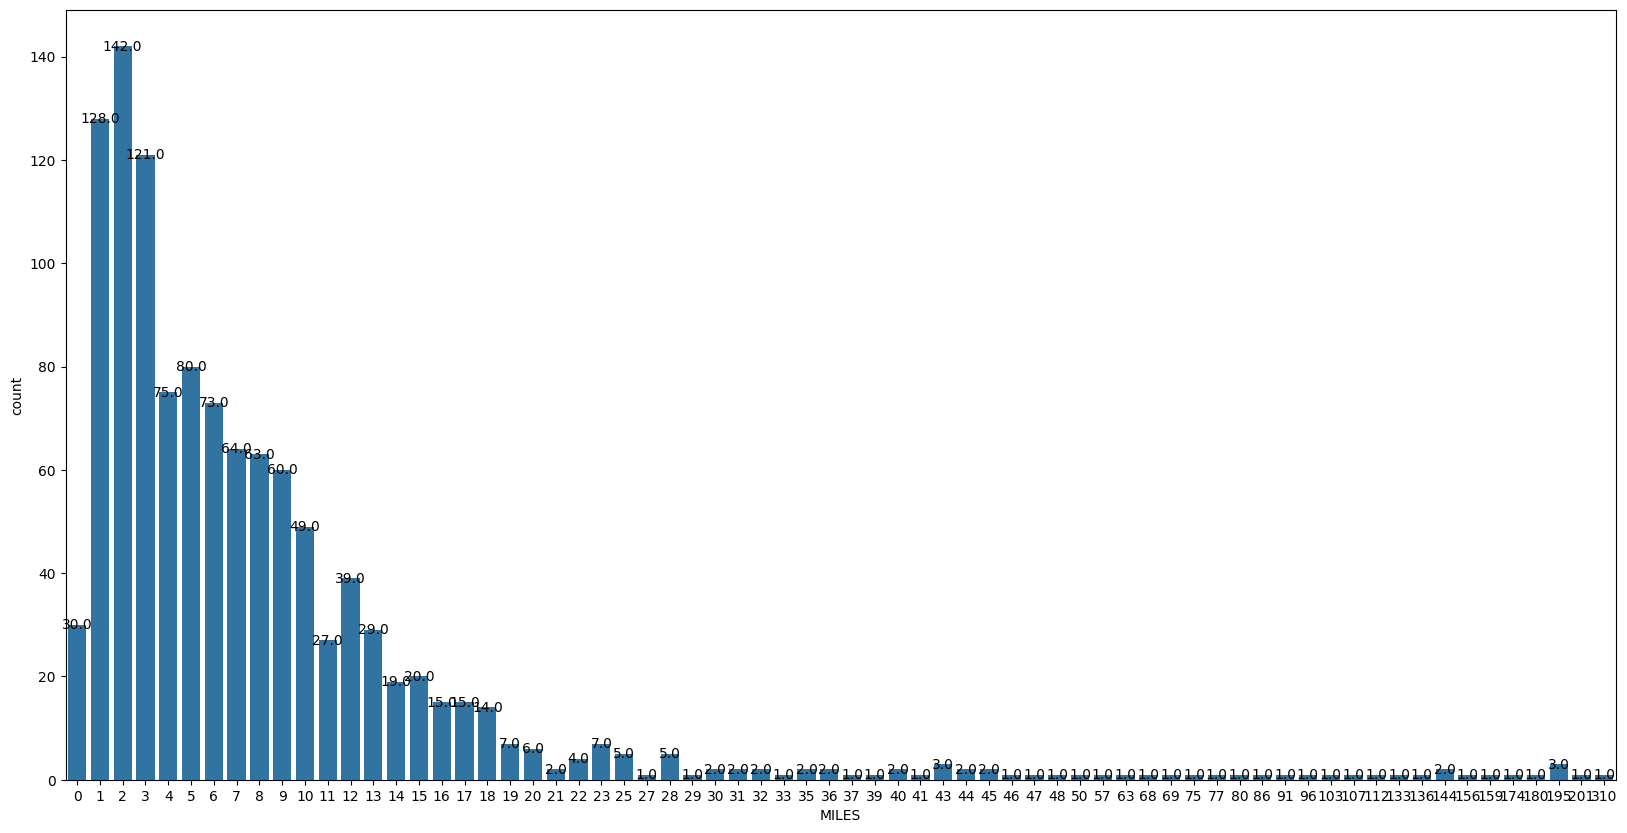

In [ ]:
plt.figure(figsize=(20,10))
a = sns.countplot(data=df,x="MILES")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
plt.show()

In [ ]:
np.mean(df["MILES"])
#people are prefering For shorter miles 0-9 miles . Further on people avoid

10.118717504332755

# Analyzing the data For Business

In [ ]:
result=df.loc[df["CATEGORY"]=="Business"]
result.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5,Meal/Entertain,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5,Missing,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4,Errand/Supplies,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4,Meeting,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63,Customer Visit,Wednesday


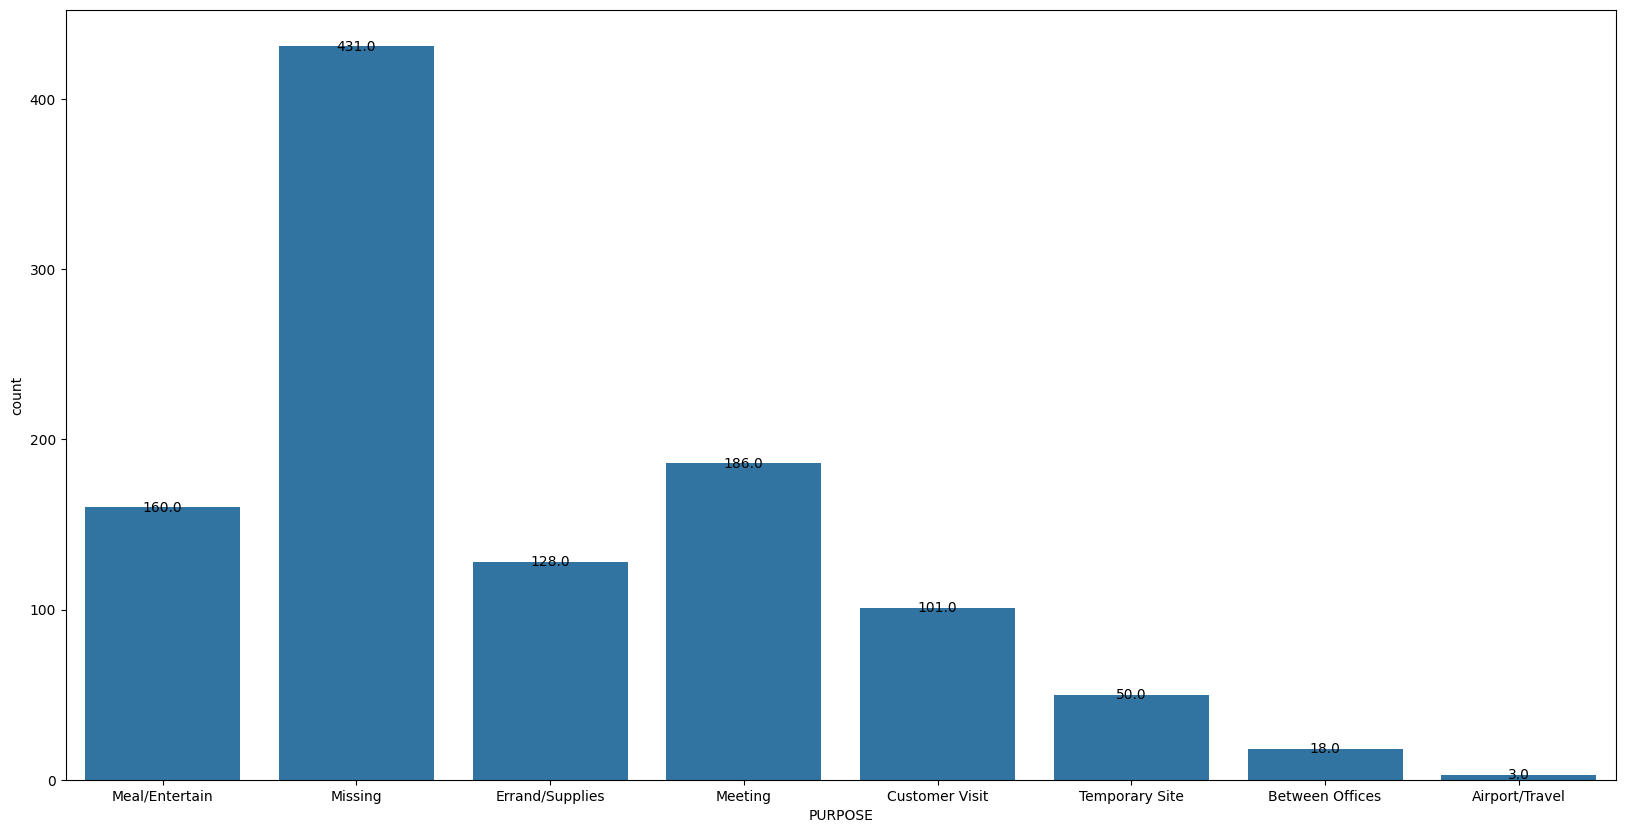

In [ ]:
plt.figure(figsize=(20,10))
a = sns.countplot(data=result,x="PURPOSE")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
plt.show()

For Business CAT most of the purposes is missing

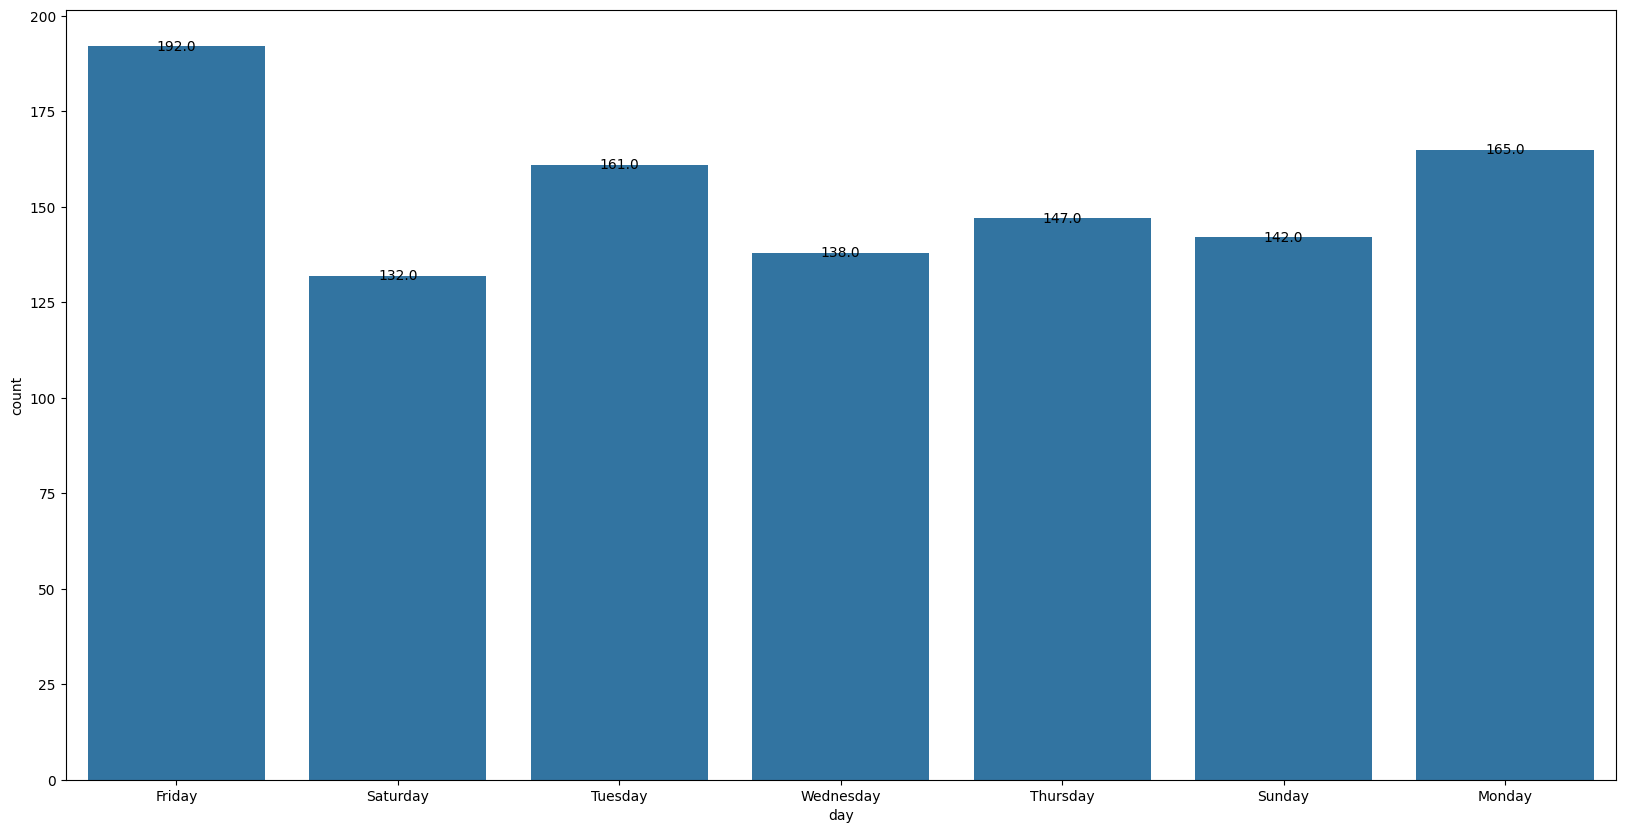

In [ ]:
plt.figure(figsize=(20,10))
a = sns.countplot(data=result,x="day")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
plt.show()

In [ ]:
result2 = df.loc[df["PURPOSE"]=="Customer Visit"]

In [ ]:
result2

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,day
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63,Customer Visit,Wednesday
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16,Customer Visit,Sunday
20,2016-01-12 15:13:00,2016-01-12 15:28:00,Business,Hudson Square,Hell's Kitchen,2,Customer Visit,Tuesday
25,2016-01-14 16:29:00,2016-01-14 17:05:00,Business,Houston,Houston,21,Customer Visit,Thursday
36,2016-01-20 13:25:00,2016-01-20 14:19:00,Business,Raleigh,Cary,40,Customer Visit,Wednesday
...,...,...,...,...,...,...,...,...
1117,2016-12-26 11:29:00,2016-12-26 11:42:00,Business,Lahore,Lahore,3,Customer Visit,Monday
1122,2016-12-27 14:49:00,2016-12-27 15:03:00,Business,Kar?chi,Unknown Location,3,Customer Visit,Tuesday
1124,2016-12-27 19:19:00,2016-12-27 19:50:00,Business,Kar?chi,Kar?chi,5,Customer Visit,Tuesday
1141,2016-12-29 19:50:00,2016-12-29 20:10:00,Business,Unknown Location,Kar?chi,4,Customer Visit,Thursday


For Business purpose Uber are used For Meeting, Customer Visit and Meal/Entertaining And Errand/Supplies. But Mostly Larger Distance is covered for Meeting and Customer Visit

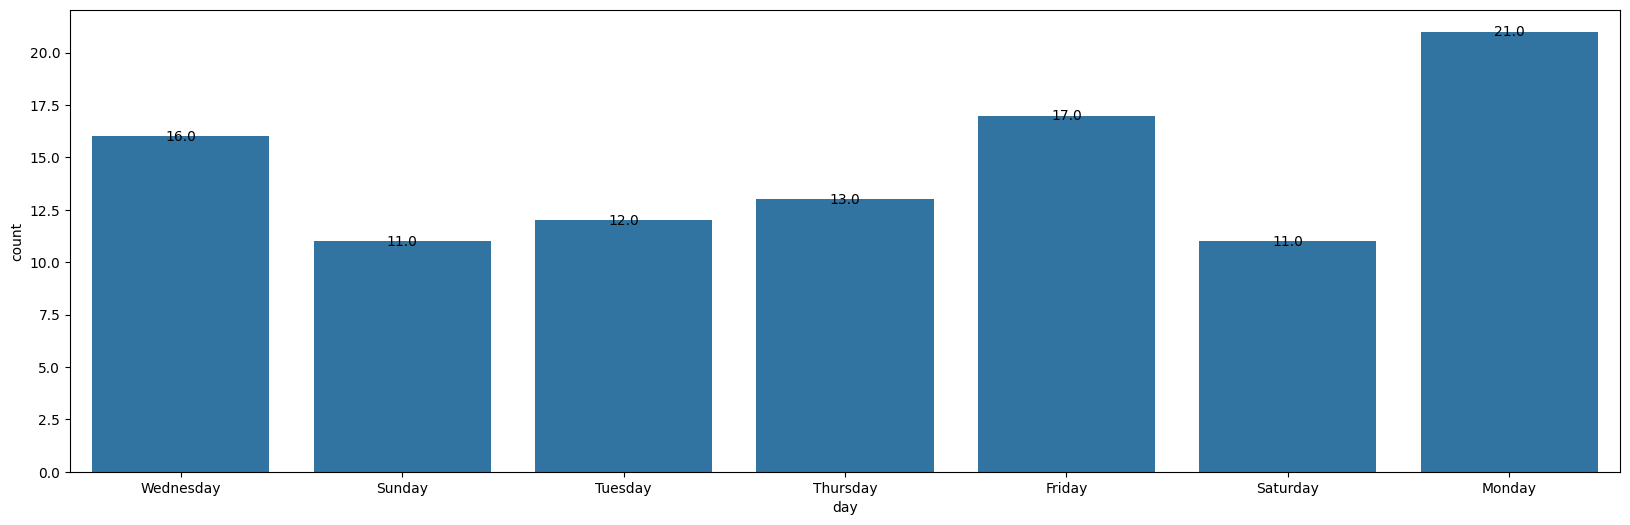

In [ ]:
plt.figure(figsize=(20,6))

a = sns.countplot(data=result2,x="day")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
plt.show()

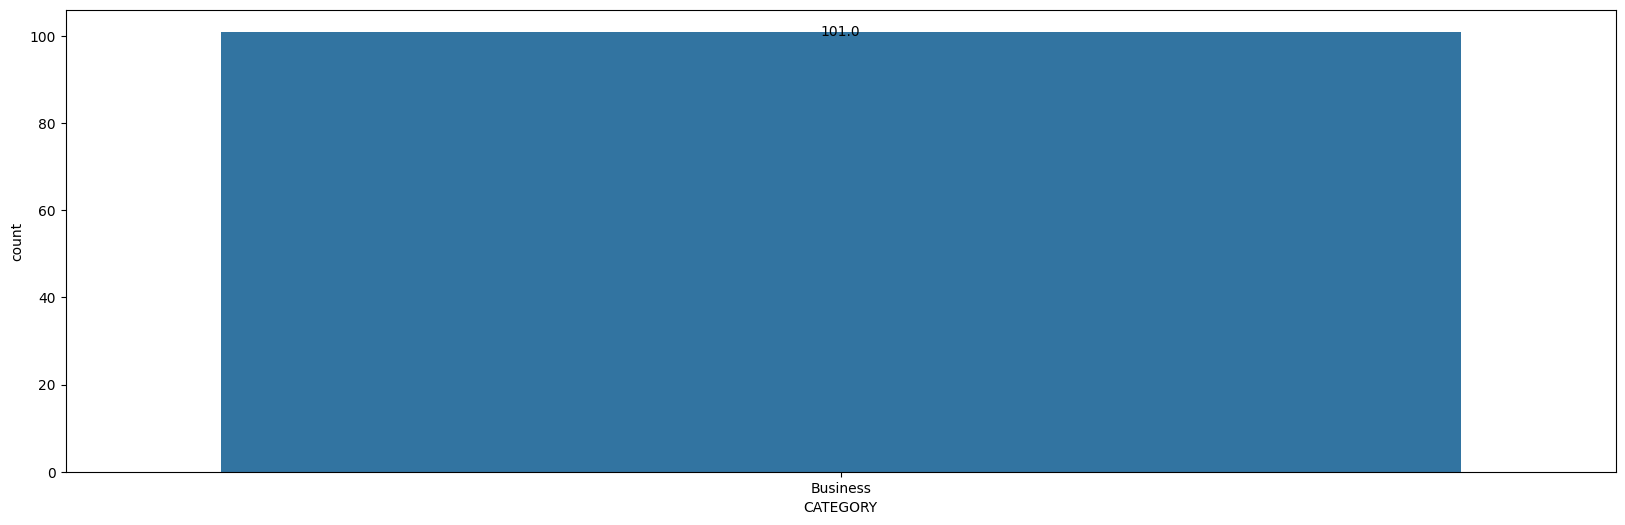

In [ ]:
plt.figure(figsize=(20,6))

a = sns.countplot(data=result2,x="CATEGORY")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
plt.show()

# What I got from the data:


1.   Overall Friday is the most day that Uber is used.
2.   The missing purpose is the highest and Airport/Travel is the lowest.
3.   Business CAT is more popular
4.   The average Miles is 10.118717504332755
**Analyzing the data For Business**

5.   The missing purpose is the highest and Airport/Travel is the lowest
6.   The frequent day is Friday


**Customer Visit**

7.   The frequent day is Monday
8.   Business CAT
9.   Longest Distance is Jacksonville










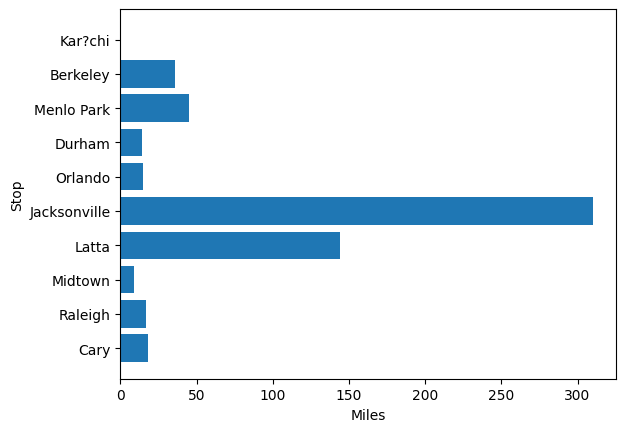

In [ ]:
plt.xlabel("Miles")
plt.ylabel("Stop")
plt.barh(results1["STOP"],results1["MILES"])
plt.show()

**Most Visited place is Jacksonville **